# Skills Demand

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



c:\Users\Pham Duc Toan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
asean_countries = ['Vietnam', 'Thailand','Malaysia','Philippines','Indonesia','Laos','Cambodia','Myanmar','Singapore']

## What are the most demanded skills for the top 3 most popular roles?

### Methodology

- Clean-up skill column
- Calculate skills based on `job_title_short`
- Calcuate skill percentage (new knowledge)
- Plot final findings

1. Clean-up skill column

In [4]:
df_SEA = df[df['job_country'].isin(asean_countries)]

df_skills = df_SEA.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
25,"Senior Officer, Data Analyst, GTO",sql
44,Binance Accelerator Program - Data Scientist (...,python
44,Binance Accelerator Program - Data Scientist (...,java
44,Binance Accelerator Program - Data Scientist (...,scala
47,Senior Data Engineering,sql
...,...,...
785736,DevOps Engineer,kubernetes
785736,DevOps Engineer,docker
785736,DevOps Engineer,ansible
785738,Commercial Analyst - Start Now,powerpoint


2. Calculate skills based on `job_title_short`

In [45]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size().copy()

df_skills_count = df_skills_count.reset_index(name='skill_counts')
df_skills_count = df_skills_count.sort_values(by='skill_counts',ascending=False)
df_skills_count

,job_skills,job_title_short,skill_counts
1393,sql,Data Analyst,7397
1394,sql,Data Engineer,6803
1102,python,Data Engineer,6217
398,excel,Data Analyst,6168
1101,python,Data Analyst,5370
...,...,...,...
493,ggplot2,Senior Data Scientist,1
996,phoenix,Machine Learning Engineer,1
1568,unity,Machine Learning Engineer,1
997,phoenix,Senior Data Analyst,1


In [46]:
top_titles = df_SEA['job_title_short'].value_counts().sort_values(ascending=False).head(3).index


top_titles = sorted(top_titles) # this function helps sort by alphabetical order

top_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

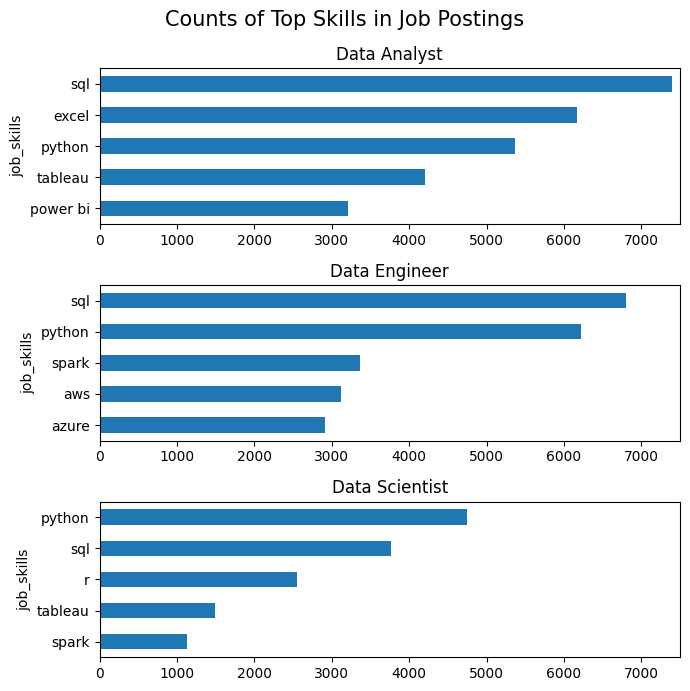

In [51]:
fig, ax = plt.subplots(len(top_titles),1)
fig.set_size_inches((7,7))
for i, job_title in enumerate(top_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']== job_title].head(5) # filter for top 5 skills
    df_plot.plot(
        kind = "barh",
        x='job_skills',
        y='skill_counts',
        ax = ax[i],
        legend = '',
        title = job_title
    )
    ax[i].set_xlim(0,7500)
    ax[i].invert_yaxis()
 


fig.suptitle('Counts of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout()

plt.show()

3. Calcuate skill percentage

- Calculate the total job postings of each role

In [43]:
df_total_jobs_count = df_SEA['job_title_short'].value_counts().reset_index(name= 'job_counts')

- Merge the above table with the df_skill_count table

In [57]:
df_skills_perc = pd.merge(left=df_skills_count,right=df_total_jobs_count,on= 'job_title_short',how= 'left')
df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_counts']/df_skills_perc['job_counts']

df_skills_perc 

,job_skills,job_title_short,skill_counts,job_counts,skill_percent
0,sql,Data Analyst,7397,16240,45.548030
1,sql,Data Engineer,6803,11799,57.657429
2,python,Data Engineer,6217,11799,52.690906
3,excel,Data Analyst,6168,16240,37.980296
4,python,Data Analyst,5370,16240,33.066502
...,...,...,...,...,...
1700,ggplot2,Senior Data Scientist,1,1568,0.063776
1701,phoenix,Machine Learning Engineer,1,1314,0.076104
1702,unity,Machine Learning Engineer,1,1314,0.076104
1703,phoenix,Senior Data Analyst,1,2428,0.041186


- Create the bar plot using the percent column

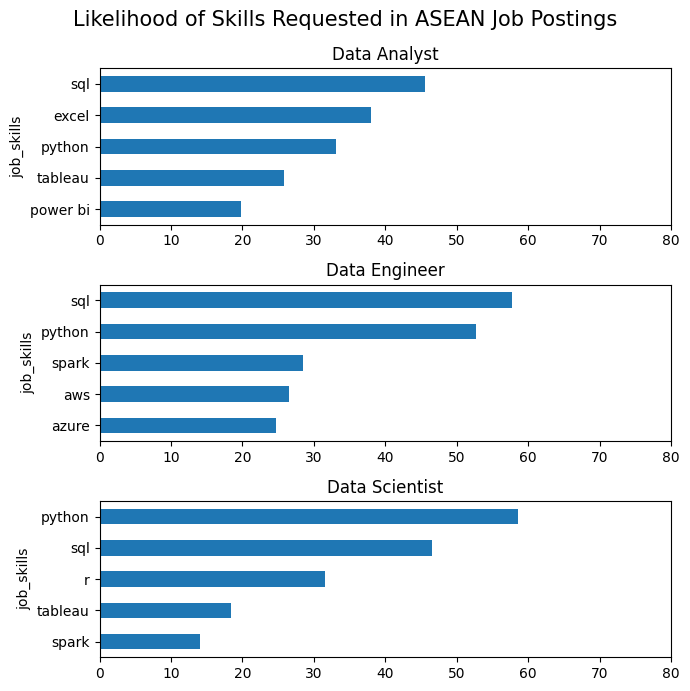

In [65]:
fig, ax = plt.subplots(len(top_titles),1)
fig.set_size_inches((7,7))
for i, job_title in enumerate(top_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short']== job_title].head(5) # filter for top 5 skills
    df_plot.plot(
        kind = "barh",
        x='job_skills',
        y='skill_percent',
        ax = ax[i],
        legend = '',
        title = job_title
    )
    ax[i].set_xlim(0,80)
    ax[i].invert_yaxis()
 


fig.suptitle('Likelihood of Skills Requested in ASEAN Job Postings', fontsize = 15)
fig.tight_layout(h_pad= 1)

plt.show()

- Now we use the seaborn lib to plot it (so we wont forget)

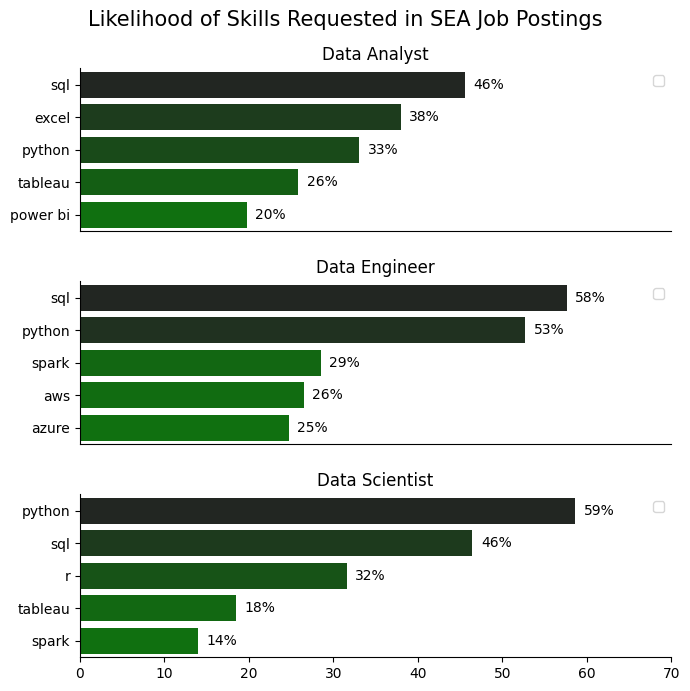

In [91]:
fig, ax = plt.subplots(len(top_titles),1)
fig.set_size_inches((7,7))
for i, job_title in enumerate(top_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short']== job_title].head(5) # filter for top 5 skills
    sns.barplot(
        data = df_plot,
        x='skill_percent',
        y='job_skills',
        ax = ax[i],
        hue = 'skill_percent',
        palette= 'dark:g_r' # r stands for reverse -> blue and reverse 
    )
    sns.despine()
    ax[i].legend('')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,70)
    if i != len(top_titles)-1: # this mean that if i = 2, the below code will not be executed
        ax[i].set_xticks([])
    
    #create a loop to place data labels onto the chart
    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(x= v+1, y= n, s=f'{v:.0f}%', va= 'center') # va stands for vertical alignment, i guess
 


fig.suptitle('Likelihood of Skills Requested in SEA Job Postings', fontsize = 15)
fig.tight_layout(h_pad= 2)

plt.show()